In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("../data/Social_Network_Ads.csv")
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
X = data.drop("Purchased",axis=1)
y = data["Purchased"]

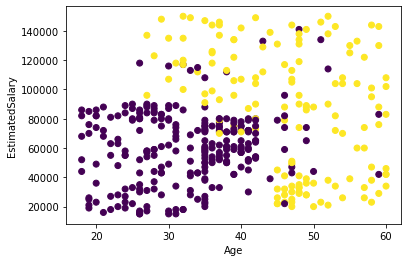

In [4]:
plt.scatter(X["Age"],X["EstimatedSalary"],c=y)
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### LogisticRegression

In [55]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train_scaled,y_train)
log_preds = log.predict(X_test_scaled)
log.score(X_test_scaled,y_test)

0.925

In [65]:
grid_log = [{}]

In [67]:
from sklearn.model_selection import GridSearchCV

gs_log = GridSearchCV(estimator=log,
                     param_grid=grid_log,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)
gs_log.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1, param_grid=[{}],
             scoring='accuracy')

In [68]:
best_params = gs_log.best_params_
best_accuracy = gs_log.best_score_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_params)

Best Accuracy: 82.50 %
Best Parameters: {}


### SupportVectorClassifier

In [56]:
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf')
svc.fit(X_train_scaled,y_train)
svc_preds = svc.predict(X_test_scaled)
svc.score(X_test_scaled,y_test)

0.95

In [57]:
grid_svc = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [62]:
from sklearn.model_selection import GridSearchCV

gs_svc = GridSearchCV(estimator=svc,
                 param_grid=grid_svc,
                 scoring='accuracy',
                 cv=10,
                 n_jobs=-1)
gs_svc.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.25, 0.5, 0.75, 1],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [63]:
best_params = gs_svc.best_params_
best_accuracy = gs_svc.best_score_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_params)

Best Accuracy: 90.62 %
Best Parameters: {'C': 0.25, 'gamma': 0.8, 'kernel': 'rbf'}


### RandomForestClassifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled,y_train)
rf_preds = rf.predict(X_test_scaled)
rf.score(X_test_scaled,y_test)

0.9375

In [74]:
grid_rf = {"n_estimators":[100,200,500],
           "max_depth":[20],
           "max_features":["auto","sqrt"],
           "min_samples_split":[2,4],
           "min_samples_leaf":[4]}

In [75]:
from sklearn.model_selection import GridSearchCV

gs_rf = GridSearchCV(estimator=rf,
                    param_grid=grid_rf,
                    scoring='accuracy',
                    cv=10,
                    n_jobs=-1)
gs_rf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [4], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [77]:
best_params = gs_rf.best_params_
best_accuracy = gs_rf.best_score_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_params)

Best Accuracy: 90.31 %
Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
